**Практическая работа #4**

Работу выполнил студент:

группы: ББМО-01-23

Белов Владимир Станиславович

**Требуется**
1. Выбрать датасет, предобработать и описать датасет, визуализировать его
2. Выбрать признаковое пространство
3. Выбрать модель машинного обучения, дающую наулучшую оценку точности по F1-мере, подготовить отчет по результатам и загрузить на гитлаб

Импортируем необходимые библиотеки для решения задачи

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

Датасет Security Patches Dataset - набор данных, содержащим информацию о патчах безопасности для операционных систем Windows и Ubuntu, выпущенных в период с 2010 по 2020 годы. Этот датасет содержит в себе размеченные данные о характеристиках уязвимостей, которые были исправлены в каждом патче безопасности. Каждый патч безопасности включает следующую информацию:

* Идентификатор патча
* Версия операционной системы
* Дата выпуска патча
* Описание уязвимости
* Уровень важности уязвимости
* Тип уязвимости (например, DoS, RCE, XSS и т.д.)
* Информация об уязвимости (например, имя файла, содержащего уязвимый код)
* Список открытых источников, в которых была опубликована информация об уязвимости

Датасет включает в себя более 16 тысяч патчей безопасности, и он может использоваться для обучения алгоритмов машинного обучения в области обнаружения и анализа уязвимостей в операционных системах.

На данном этапе мы выберем и загрузим набор и произведём следующую обработку данных:

1) Удалим столбцы без имени.

2) выведем информация о наборе.

3) Удалим строки с пропущенными значениями в столбце 'score'.

4) Проведём предобработку полученных данных.

In [73]:
# Загрузка набора данных
data = pd.read_csv("/content/sample_data/github-secbench-patches.csv", on_bad_lines='skip')

# Удаление столбцов без имени
data = data.loc[:, ~data.columns.str.startswith('Unnamed')]

# Проверка наличия столбцов
print(data.columns)

# Описание датасета
print(data.info())

# Удаление строк с пропущенными значениями в столбце 'score'
data = data.dropna(subset=['score'])

# Предобработка данных
data_stat = ['year', 'score', 'severity']
data_clean = data.dropna(subset=['year', 'score', 'severity'])


Index(['owner', 'project', 'sha', 'sha-p', 'year', 'language', 'cve_id',
       'cwe_id', 'score', 'severity'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   owner     676 non-null    object 
 1   project   676 non-null    object 
 2   sha       676 non-null    object 
 3   sha-p     676 non-null    object 
 4   year      676 non-null    int64  
 5   language  676 non-null    object 
 6   cve_id    202 non-null    object 
 7   cwe_id    578 non-null    object 
 8   score     183 non-null    float64
 9   severity  188 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 52.9+ KB
None


Выведем информацию из набора данныых, построим гистограммы распределения целевой переменной 'score'.

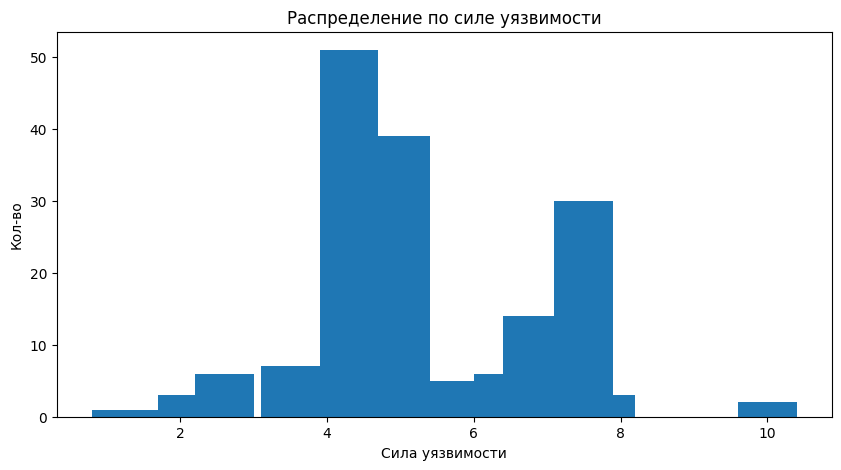

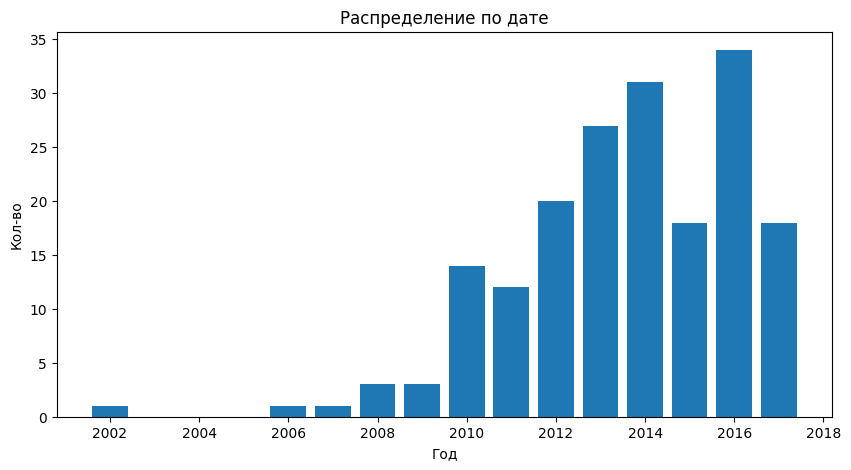

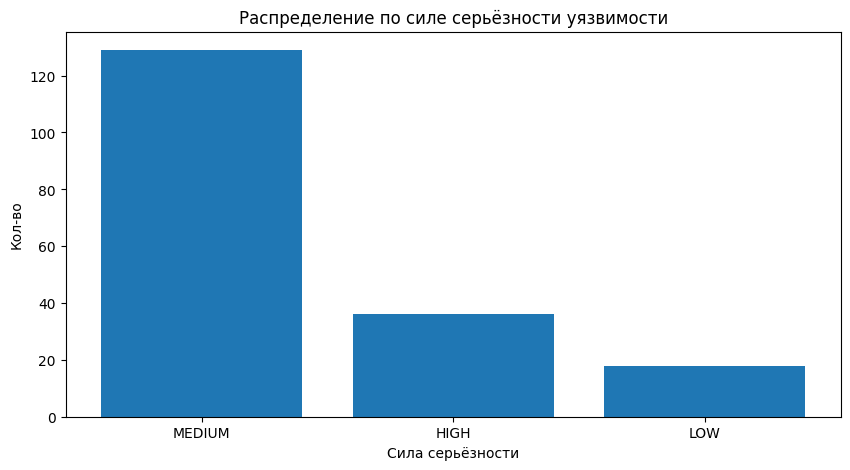

In [75]:
plt.figure(figsize=(10, 5))
score_counts = data_clean['score'].value_counts()
plt.bar(score_counts.index, score_counts.values)
plt.xlabel('Сила уязвимости')
plt.ylabel('Кол-во')
plt.title('Распределение по силе уязвимости')
plt.show()

plt.figure(figsize=(10, 5))
year_counts = data_clean['year'].value_counts().sort_index()
plt.bar(year_counts.index, year_counts.values)
plt.xlabel('Год')
plt.ylabel('Кол-во')
plt.title('Распределение по дате')
plt.show()

plt.figure(figsize=(10, 5))
severity_counts = data_clean['severity'].value_counts()
plt.bar(severity_counts.index, severity_counts.values)
plt.xlabel('Сила серьёзности')
plt.ylabel('Кол-во')
plt.title('Распределение по силе серьёзности уязвимости')
plt.show()

Разделение набор на обучающую и тестовую выборки

In [76]:
X = data_clean[['year', 'score']]
y = data_clean['severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Обучим набор методами логистической регресии, случайного леса, К-ближайших соседей и Наивный Байесовский Классификатором.

In [79]:
models = [
    ('Логистическая регресия', LogisticRegression(random_state=42)),
    ('Случайный лес', RandomForestClassifier(random_state=42)),
    ('К-ближайших соседей', KNeighborsClassifier()),
    ('Наивный Байесовский Классификатор', GaussianNB()),
]

Сделаем цикл оценки точности по F1-мере для кажкой модели и выведем результат

In [83]:

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f'{name}, F1-мера: {f1}')

Логистическая регресия, F1-мера: 0.9379021879021878
Случайный лес, F1-мера: 0.9719901719901719
К-ближайших соседей, F1-мера: 0.8626891041985382
Наивный Байесовский Классификатор, F1-мера: 0.8392238392238393


Для данного набора данных, модель случайного леса показала лучший результат, а худший - Наивный Байесовский Классификатор.